# 5G-Slcer Demo
Initially, we import the 5G-Slicer's SDK (`SlicerSDK`) and the respective use-case (`BusExperiment`) from the usecases package.

In [1]:
from usecases.dublin_buses_experiment import BusExperiment
from SlicerSDK import SlicerSDK

## Use-case Object Instatiation
Then, we create the experiment object (`bus_experiment`), which retrieves the Dublin's buses and bus stops data, performs an initial analysis, and creates the creates `slicerSDK` object. 
The new object includes every information that needed to deploy the experiment.

In [2]:
bus_experiment = BusExperiment(
    SlicerSDK("http://controller:5000", "docker-compose-demo.yaml"), # initial SlicerSDK model
    num_of_RUs=100, # number of radio units
    num_of_clouds=1, # number of cloud servers
    num_of_edge=4, # number of MEC servers
    num_of_buses=7, # number of IoT devices
    max_num_of_trace_steps=50, # trajectories information
    min_num_of_trace_steps=1, 
    bus_ids=[331416615, 335096213, 360603795, 380192314, 430355076, 335862098, 335096213], # IoT ids
    bounding_box=( 
        (53.351627215495036, -6.294565200805664), # bounding box in which the devices will operate
        (53.36187249371434, -6.234655380249024)),
    seed=1) # Random seed to keep the same EDGE nodes during the experiment
slicerSDK = bus_experiment.generate_experiment()  # creation of the experimental data

MEC_full='EDGE_8220DB000010_1'
MEC_empty='EDGE_8220DB000798_1'
bus='bus_331416615_1'

/home/jovyan/work/usecases/dublin_buses_experiment.py:47: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  self.fill_trace_dataframe()


## Deployment
5G-Slicer provides the `deploy` and `undeploy` functions with which the user can deploy and undeploy his/her description.
The system performs the emulation with the help of Fogify, which is a Fog Computing emulation framework (https://github.com/UCY-LINC-LAB/fogify)

In [3]:
slicerSDK.deploy()

Deploy process: 100%|██████████| 11/11 [00:10<00:00,  1.04it/s]
 * Tip: There are .env or .flaskenv files present. Do "pip install python-dotenv" to use them.


 * Serving Flask app 'utils.server' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


## Data Analysis

`SlicerSDK` gives users the opportunity to retrieve their data as pandas dataframes and perform analysis on them.

In [7]:
df_bus = slicerSDK.get_metrics_from(bus)

### Raw Tables

In [8]:
df_bus

,cpu_util,cpu,memory,memory_util,disk_bytes,network_rx_dublin_network,network_tx_dublin_network,count
timestamp,,,,,,,,
2022-04-17 12:27:38,5.138134,1.375900e+09,16175104.0,6.025696,53248.0,38707.0,45362.0,4
2022-04-17 12:27:42,4.596679,1.442212e+09,16240640.0,6.050110,53248.0,46043.0,72433.0,5
2022-04-17 12:27:47,6.133852,1.528969e+09,16232448.0,6.047058,53248.0,57242.0,117409.0,6
2022-04-17 12:27:52,8.085177,1.648164e+09,16232448.0,6.047058,53248.0,74752.0,188774.0,7
2022-04-17 12:27:54,7.605285,1.691990e+09,16232448.0,6.047058,53248.0,82558.0,218366.0,8
2022-04-17 12:27:58,8.397914,1.793020e+09,16232448.0,6.047058,53248.0,95050.0,270818.0,9
2022-04-17 12:28:01,8.616867,1.873289e+09,16232448.0,6.047058,53248.0,105595.0,313369.0,10
2022-04-17 12:28:06,7.878950,1.980843e+09,16232448.0,6.047058,53248.0,118945.0,368839.0,11
2022-04-17 12:28:09,8.431494,2.065124e+09,16236544.0,6.048584,53248.0,128419.0,407934.0,12


### Summarized Statistics

In [9]:
df_bus.describe()

,cpu_util,cpu,memory,memory_util,disk_bytes,network_rx_dublin_network,network_tx_dublin_network,count
count,12.000000,1.200000e+01,1.200000e+01,12.000000,12.0,12.000000,12.000000,12.000000
mean,7.504993,1.850324e+09,1.622903e+07,6.045787,53248.0,100566.166667,294222.416667,9.500000
std,1.410949,3.260137e+08,1.718664e+04,0.006403,0.0,42007.596114,171025.581923,3.605551
min,4.596679,1.375900e+09,1.617510e+07,6.025696,53248.0,38707.000000,45362.000000,4.000000
25%,7.237427,1.618365e+09,1.623245e+07,6.047058,53248.0,70374.500000,170932.750000,6.750000
50%,8.047568,1.833155e+09,1.623245e+07,6.047058,53248.0,100322.500000,292093.500000,9.500000
75%,8.462703,2.092787e+09,1.623347e+07,6.047440,53248.0,131755.500000,421762.000000,12.250000
max,8.616867,2.363520e+09,1.624064e+07,6.050110,53248.0,165235.000000,558274.000000,15.000000


### Plots

<AxesSubplot:xlabel='timestamp'>

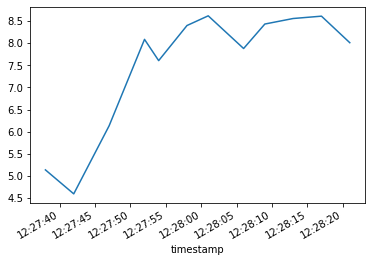

In [10]:
df_bus.cpu_util.plot()

### Analysis via the Interactive Map
The 5G-Slicer framework provides an interactive map, and users can change the locations of the mobile nodes at runtime on the map without needing redeployment.
Moreover, a user can move a mobile node on map and this action will be performed in the emulated environment and also there will be an update at the infrastructure meterics 

In [11]:
slicerSDK.generate_map('dublin_network')

Map(center=[53.35663304618565, -6.2651331442033085], controls=(ZoomControl(options=['position', 'zoom_in_text'…

<AxesSubplot:xlabel='timestamp'>

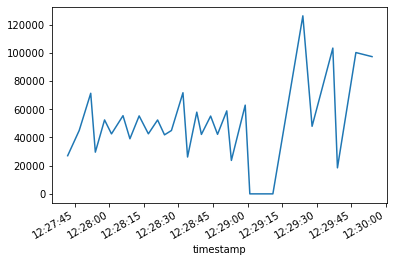

In [17]:
df_bus = slicerSDK.get_metrics_from(bus)
df_bus.network_tx_dublin_network.diff().plot()

## Profiling of MECs and Energy Modeling

Users also have the opportunity to perform analysis of node profiles and energy consumption models.

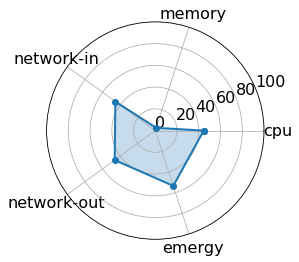

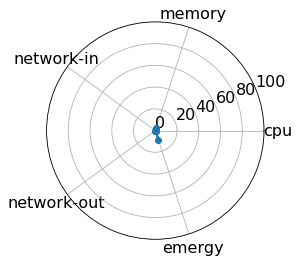

In [18]:
energy_model = '4*cpu + 0.5*memory + 1*network_in_ptc + 1*network_out_ptc + 0.5'
max_energy_consumption = 6

slicerSDK.profile(MEC_full, 'dublin_network', 
        energy_model=energy_model, 
        max_energy_consumption=max_energy_consumption, last=5)

slicerSDK.profile(MEC_empty, 'dublin_network', 
        energy_model=energy_model, 
        max_energy_consumption=max_energy_consumption, last=5)

## Mobility Evaluation
Users can execute auto-generated mobility scenarios 

In [19]:
start, end = slicerSDK.scenario_execution('mobility_scenario')

100%|██████████| 215/215 [03:45<00:00,  1.05s/it]


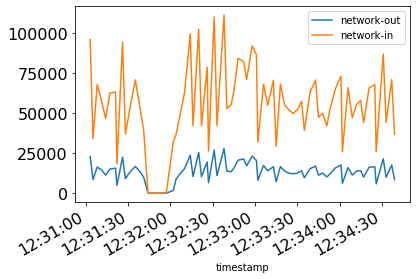

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
fig, ax = plt.subplots()

data = slicerSDK.get_metrics_from(MEC_full)
data = data[data.index>start]
data = data[data.index<end]

data['network_tx_dublin_network'].diff().plot(ax=ax,label="network-out")
data['network_rx_dublin_network'].diff().plot(ax=ax,label="network-in")
ax.legend()

<AxesSubplot:xlabel='timestamp'>

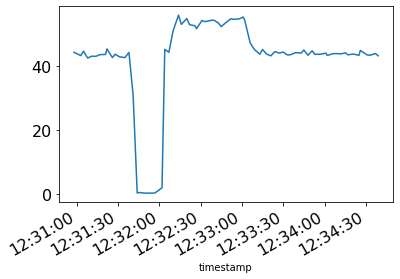

In [24]:
data.cpu_util.plot()

<AxesSubplot:xlabel='cpu_util', ylabel='network-edge'>

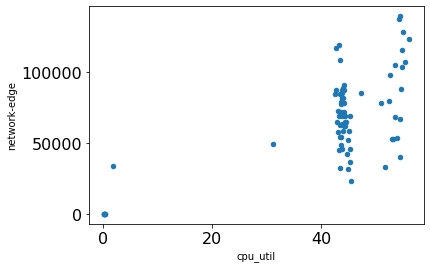

In [25]:
data['network-edge'] = data['network_tx_dublin_network'].diff() + data['network_rx_dublin_network'].diff()
data.plot.scatter('cpu_util', 'network-edge')

In [26]:
slicerSDK.undeploy()

Undeploy process: 100%|██████████| 11/11 [00:15<00:00,  1.39s/it]
